In [156]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import datetime
from datetime import date
from datetime import time
from datetime import datetime
import seaborn as sns
import scipy as sp
import random
import time

#A Data Science Framework
#Define the Problem
#Gather the Data:
#Prepare Data for Consumption
#Perform Exploratory Analysis
#Model Data
#Validate and Implement Data Model
#Optimize and Strategize
# load data modelling libraries
#algorithms
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
## common model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import feature_extraction
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
path = 'H:/data/titanic'
os.chdir(path)
os.getcwd()

'H:\\data\\titanic'

In [15]:
import os
os.getcwd()

'H:\\data\\titanic'

In [16]:
data_raw = pd.read_csv('train.csv', sep = ',')
data_val = pd.read_csv('test.csv', sep = ',')
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

In [17]:
data_raw.shape

(891, 12)

In [18]:
#print (data_raw.info()) 
data_raw.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.00,1,1,PC 17756,83.1583,E49,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
226,227,1,2,"Mellors, Mr. William John",male,19.00,0,0,SW/PP 751,10.5000,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.00,1,0,13507,55.9000,E44,S


In [19]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test columns with null values:\n',data_val.isnull().sum())
print("-"*10)
#Age 
#Cabin
#Embarked 


Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [20]:
data_cleaner = [data1, data_val]

In [21]:
## treat missing values
for dataset in data_cleaner:
    
    dataset["Age"].fillna(dataset["Age"].median(), inplace = True)
    
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace = True)
    
    dataset["Fare"].fillna(dataset["Fare"].median(), inplace = True)

drop_column = ['PassengerId','Ticket','Cabin']

data1.drop (drop_column, axis =1, inplace = True)
    
print(data1.isnull().sum())
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [24]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
for i in data_cleaner:
    
    i["Age"].fillna(i["Age"].median(), inplace = True)
    
    i["Embarked"].fillna(i["Embarked"].mode()[0], inplace = True)
    
    i["Fare"].fillna(i["Fare"].median(), inplace = True)

drop_column = ['PassengerId','Ticket','Cabin']

data1.drop (drop_column, axis =1, inplace = True)
    
print(data1.isnull().sum())
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [25]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] >1 ] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
## cleanup rare little names
print(data1['Title'].value_counts)

<bound method IndexOpsMixin.value_counts of 0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Title, Length: 891, dtype: object>


In [27]:
stat_min = 10
title_names = (data1['Title'].value_counts()<stat_min)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [29]:
## convert formats- we will convert categorical data  to dummy variables for mathematical analysis
## multiple ways to encode categorical vatiable
## categorical encoding
## sklearn label encoder
## sklear onehot encoder
## pandas categorical type
## pandas get_dummies


In [30]:
## convert objects to category using label encoder
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
## define y variable
Target  = ['Survived']
#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x

In [31]:
#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [32]:
#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



In [33]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [34]:
## double-check clean data
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)


Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

In [35]:

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)

train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)

train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

In [157]:
##exploratory analysis using stat
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Title'],data1[Target[0]]))


Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

In [ ]:
## data sets
train1_x, test1_x, train1_y, test1_y 
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin 
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy

In [158]:
train1_x.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000


In [163]:
## Logistic REgression in python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_recall_curve, log_loss, f1_score, average_precision_score

logreg = LogisticRegression()
logreg.fit(train1_x, train1_y)
y_pred = logreg.predict(test1_x)
y_pred_prob = logreg.predict_proba(test1_x)[:,1]
[fpr, tpr, thr] = roc_curve(test1_y, y_pred_prob)
print(logreg.__class__.__name__ + "accuracy is %2.3f" % accuracy_score(test1_y, y_pred))
print(logreg.__class__.__name__ + "log_loss is %2.3f" % log_loss(test1_y, y_pred))
print(logreg.__class__.__name__ + "auc is %2.3f" % auc(fpr, tpr))

LogisticRegressionaccuracy is 0.785
LogisticRegressionlog_loss is 7.434
LogisticRegressionauc is 0.870


C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC is 0.87


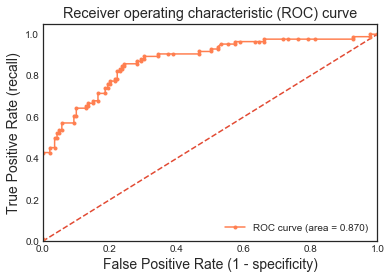

In [160]:
## plot ROC (Receiver Operating Characteristcs) curve
idx = np.min(np.where(tpr > 0.95))

## calculate auc
auc = roc_auc_score(test1_y, y_pred_prob)
print('AUC is %3.2f'% auc)
[fpr, tpr, thr] = roc_curve(test1_y, y_pred_prob)

import matplotlib.pyplot as plt
plt.figure()
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color='coral', label='ROC curve (area = %0.3f)' % auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
# show the plot
plt.show()

f1 = 0.700 ap = 0.617


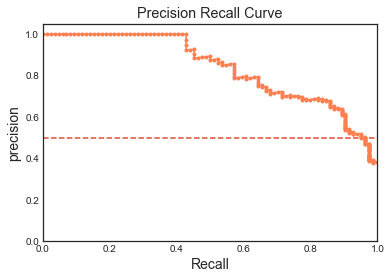

In [171]:
## Precision Recall Curve for a classification problem

probs = logreg.predict_proba(test1_x)
probs = probs[:, 1]
## calculate precision recall curve
precision, recall, thresolds = precision_recall_curve(test1_y, probs)
## calculate f1 score
f1 = f1_score(test1_y, y_pred)
## calculate precision recall auc
#auc = auc(recall, precision)
## calculate average precision score
ap = average_precision_score(test1_y, y_pred)
print('f1 = %.3f ap = %.3f' % (f1, ap))

import matplotlib.pyplot as plt
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.', color='coral')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('precision', fontsize=14)
plt.title('Precision Recall Curve')

# show the plot
plt.show()

f1=0.836 auc=0.892 ap=0.840


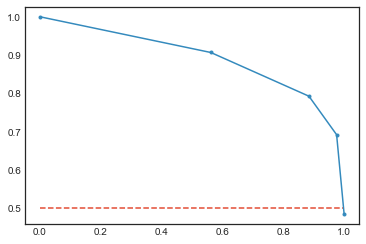

In [155]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [172]:
## confusion matrix
confusion_mtr = confusion_matrix(y_true = test1_y , y_pred= y_pred )

In [ ]:
## model parameters
penalty : str, ‘l1’ or ‘l2’, default: ‘l2’
Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.

New in version 0.19: l1 penalty with SAGA solver (allowing ‘multinomial’ + L1)



intercept_scaling : float, default 1.
Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight.

Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

class_weight : dict or ‘balanced’, default: None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

New in version 0.17: class_weight=’balanced’


solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’.
Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

New in version 0.17: Stochastic Average Gradient descent solver.

New in version 0.19: SAGA solver.

Changed in version 0.20: Default will change from ‘liblinear’ to ‘lbfgs’ in 0.22.

max_iter : int, default: 100
Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge.

multi_class : str, {‘ovr’, ‘multinomial’, ‘auto’}, default: ‘ovr’
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.


verbose : int, default: 0
For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.



n_jobs : int or None, optional (default=None)
Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

Attributes:	
classes_ : array, shape (n_classes, )
A list of class labels known to the classifier.

coef_ : array, shape (1, n_features) or (n_classes, n_features)
Coefficient of the features in the decision function.

coef_ is of shape (1, n_features) when the given problem is binary. In particular, when multi_class=’multinomial’, coef_ corresponds to outcome 1 (True) and -coef_ corresponds to outcome 0 (False).

intercept_ : array, shape (1,) or (n_classes,)
Intercept (a.k.a. bias) added to the decision function.

If fit_intercept is set to False, the intercept is set to zero. intercept_ is of shape (1,) when the given problem is binary. In particular, when multi_class=’multinomial’, intercept_ corresponds to outcome 1 (True) and -intercept_ corresponds to outcome 0 (False).

n_iter_ : array, shape (n_classes,) or (1, )
Actual number of iterations for all classes. If binary or multinomial, it returns only 1 element. For liblinear solver, only the maximum number of iteration across all classes is given.

